Adrien ESTARDY - Nathan FAGNOU - Valentine GASNIER - MMN3

# MACHINE LEARNING : FINAL PROJECT 
## Objective : Predict the durability of Aircraft
# Introduction:
### Aerospace Structural Design Dataset Analysis

This project focuses on the analysis and predictive modeling of an aerospace structural design dataset, consisting of 1,000 observations collected from simulations and material data. The dataset aims to support the optimization of aircraft structural components by analyzing material properties, geometrical features, and computational simulation results.

The dataset contains 17 physical/geometrical variables and 4 simulation variables, totaling 21 columns  for analysis. Each variable includes essential information about materials, structural geometry, operational conditions, and performance metrics. The variables are detailed as follows: Aerospace Structural Design Dataset Analysis

---

### Dataset Overview

The dataset contains 17 physical/geometrical variables and 4 simulation variables, totaling 21 columns relevant for analysis. Each variable includes essential information about materials, structural geometry, operational conditions, and performance metrics. 

### Physical / Geometrical Variables

| Variable | Description | Unit |
|----------|-------------|------|
| Material Type | Type of material used in the structural component | Categorical |
| E (GPa) | Young’s modulus of the material | GPa |
| ν | Poisson’s ratio of the material | Dimensionless |
| ρ (kg/m³) | Density of the material | kg/m³ |
| Tensile Strength (MPa) | Maximum tensile stress before failure | MPa |
| Operational Life (years) | Expected operational life of the component | Years |
| Young’s Modulus | Alternative measure of material stiffness | GPa |
| Altitude (m) | Operational altitude | m |
| Temperature (°C) | Operational temperature | °C |
| Pressure (Pa) | Operational pressure | Pa |
| Wing Span (m) | Aircraft wing span (distance from the tip of one wing to the tip of the other wing) | m |
| Fuselage Length (m) | Aircraft fuselage length (central body of an aircraft) | m |
| Structural Thickness (mm) | Thickness of structural elements | mm |
| Structural Shape | Type of structural shape | Categorical |
| Load Distribution | Load distribution pattern on the structure | Categorical |
| Vibration Damping | Type or level of vibration damping applied | Categorical |
| Weight Efficiency | Ratio of structural performance to weight | Dimensionless / Score |

### Simulation Variables

| Variable | Description | Unit |
|----------|-------------|------|
| Computational Time | Time required for simulation | Seconds |
| Quantum Algorithm Type | Type of quantum algorithm used | Categorical |
| Number of Iterations | Number of optimization iterations | Integer |
| Optimization Time (sec) | Total optimization time | Seconds |

---

## Project Objectives

The primary goals of this project are to: Analyze relationships between material properties, structural geometry, and operational conditions. Predict the operational life of aerospace components using machine learning models.

---

This dataset provides a comprehensive view of how material choices, structural parameters, and operational conditions influence the performance and longevity of aerospace components, enabling engineers and data scientists to optimize designs efficiently and safely.

## Libraries :

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Import Dataset :

In [202]:
path_valentine = r"C:\Users\valen\OneDrive - De Vinci\cours A4 ESILV\Commun\Machine Learning\Final Project\aerospace_dataset_fixed_1000.csv"
path_adrien = r"C:\Users\adrie\OneDrive\Bureau\Projet ML\aerospace_dataset_fixed_1000.csv"
path_nathan = ""

#Creation of the dataset (do not forget to insert your path to the csv file /!\
df = pd.read_csv(path_valentine)

print("List of dataset columns :")
for col in df.columns:
    print(f"-> {col}")

List of dataset columns :
-> Material Type
-> E (GPa)
-> ν
-> ρ (kg/m³)
-> Tensile Strength (MPa)
-> Young’s Modulus
-> Altitude (m)
-> Temperature (°C)
-> Pressure (Pa)
-> Operational Life (years)
-> Wing Span (m)
-> Fuselage Length (m)
-> Structural Thickness (mm)
-> Structural Shape
-> Load Distribution
-> Vibration Damping
-> Weight Efficiency
-> Durability
-> Computational Time
-> Quantum Algorithm Type
-> Number of Iterations
-> Optimization Time (sec)


In [203]:
print("Five first rows of the dataset:\n\n")
df.head()

Five first rows of the dataset:




,Material Type,E (GPa),ν,ρ (kg/m³),Tensile Strength (MPa),Young’s Modulus,Altitude (m),Temperature (°C),Pressure (Pa),Operational Life (years),...,Structural Thickness (mm),Structural Shape,Load Distribution,Vibration Damping,Weight Efficiency,Durability,Computational Time,Quantum Algorithm Type,Number of Iterations,Optimization Time (sec)
0,Composite,141.708780,0.293017,1588.479964,583.675655,143069.963506,3120.576483,-4.737726,68696.231977,25.553339,...,18.995139,Box,Uniform,High,0.823058,1.774927,464.972886,QAOA,472,91.078003
1,Steel,219.380854,0.315615,7753.788343,1201.562861,219094.502142,4620.696669,-19.183808,57364.381209,33.771281,...,5.054841,Box,Uniform,Medium,0.632313,2.670468,314.614448,QAOA,312,59.737691
2,Aluminum,74.752119,0.330320,2744.509921,317.232722,77492.453814,11315.793409,-58.736571,24319.246429,24.753846,...,2.172047,I-Beam,Tip-loaded,Medium,0.906496,1.234871,326.959916,Grover,216,66.103227
3,Composite,137.115482,0.272466,1651.762467,602.781208,130418.034889,7324.512717,-32.577282,39937.880350,25.983752,...,6.268369,I-Beam,Tip-loaded,High,0.959128,1.979253,503.633222,Grover,337,98.600215
4,Composite,135.507927,0.284600,1507.690607,568.460070,131795.994791,10019.685428,-48.538755,29416.138129,22.148339,...,6.230518,Box,Tip-loaded,Low,0.817331,1.658538,305.710180,VQE,203,58.631572


## Dataset Analysis

In [205]:
df.info()
print(f"\nNombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Material Type              1000 non-null   object 
 1   E (GPa)                    1000 non-null   float64
 2   ν                          1000 non-null   float64
 3   ρ (kg/m³)                  1000 non-null   float64
 4   Tensile Strength (MPa)     1000 non-null   float64
 5   Young’s Modulus            1000 non-null   float64
 6   Altitude (m)               1000 non-null   float64
 7   Temperature (°C)           1000 non-null   float64
 8   Pressure (Pa)              1000 non-null   float64
 9   Operational Life (years)   1000 non-null   float64
 10  Wing Span (m)              1000 non-null   float64
 11  Fuselage Length (m)        1000 non-null   float64
 12  Structural Thickness (mm)  1000 non-null   float64
 13  Structural Shape           1000 non-null   object

In [206]:
df.describe()

,E (GPa),ν,ρ (kg/m³),Tensile Strength (MPa),Young’s Modulus,Altitude (m),Temperature (°C),Pressure (Pa),Operational Life (years),Wing Span (m),Fuselage Length (m),Structural Thickness (mm),Weight Efficiency,Durability,Computational Time,Number of Iterations,Optimization Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,134.840832,0.312680,4286.889575,758.639309,134855.677825,6009.094943,-24.150972,52516.845046,27.695311,49.744973,32.260435,10.958454,0.753697,1.909414,363.999970,273.004000,72.761786
std,53.238090,0.024916,2408.796571,346.206128,53271.666706,3512.475841,23.029381,22571.273436,3.952089,17.849992,10.112386,5.350864,0.121733,0.760987,190.816558,132.768307,38.153943
min,55.757287,0.250596,1450.443201,239.847353,51634.035195,47.020499,-66.734848,22305.136195,18.248961,20.009465,15.046677,2.025528,0.407369,0.264739,43.617856,50.000000,8.218741
25%,79.760258,0.292481,2623.388817,340.301832,84506.825694,2920.523492,-44.518771,32445.865466,24.607576,33.997379,23.299563,6.206527,0.669201,1.271914,199.493940,158.750000,39.716735
50%,131.921878,0.312289,4415.749924,861.198552,129064.416337,6027.917837,-24.563335,47791.161821,27.772587,49.100939,31.897790,10.774085,0.762145,1.913685,347.360948,277.500000,69.810902
75%,203.823394,0.334531,7745.423451,1174.496145,200669.046625,9109.351933,-4.000260,70443.032207,30.904554,65.866594,40.917685,15.846827,0.833732,2.527178,495.057869,391.000000,99.524571
max,222.800423,0.366443,7947.454721,1246.072775,231481.009282,11993.528173,16.740050,101367.758373,38.611363,79.925002,49.959569,19.969457,1.104632,3.585248,754.996023,499.000000,155.485217


In [207]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nNumerical columns:")
for col in numerical_cols:
    print(f"-> {col}")
print("\nCategorical columns:")
for col in categorical_cols:
    print(f"-> {col}")


Numerical columns:
-> E (GPa)
-> ν
-> ρ (kg/m³)
-> Tensile Strength (MPa)
-> Young’s Modulus
-> Altitude (m)
-> Temperature (°C)
-> Pressure (Pa)
-> Operational Life (years)
-> Wing Span (m)
-> Fuselage Length (m)
-> Structural Thickness (mm)
-> Weight Efficiency
-> Durability
-> Computational Time
-> Number of Iterations
-> Optimization Time (sec)

Categorical columns:
-> Material Type
-> Structural Shape
-> Load Distribution
-> Vibration Damping
-> Quantum Algorithm Type


In [208]:
#Division of the dataset into Physical/Geometrical features and simulation features
Physical_features = [
    'Material Type',
    'E (GPa)',
    'ν',
    'ρ (kg/m³)',
    'Tensile Strength (MPa)',
    'Operational Life (years)',
    'Young’s Modulus',
    'Altitude (m)',
    'Temperature (°C)',
    'Pressure (Pa)',
    'Wing Span (m)',
    'Fuselage Length (m)',
    'Structural Thickness (mm)',
    'Structural Shape',
    'Load Distribution',
    'Vibration Damping',
    'Weight Efficiency',
        'Durability',
]

Simulation_features = [
    'Computational Time',
    'Quantum Algorithm Type',
    'Number of Iterations',
    'Optimization Time (sec)'
]

# Creation of two new datasets :
# -> One related to physical features
# -> One related to simulation features

df_physical = df[Physical_features]
df_simulation = df[Simulation_features]



## Visualization of Data

### i) Distribution of regression target variable: Operational Life

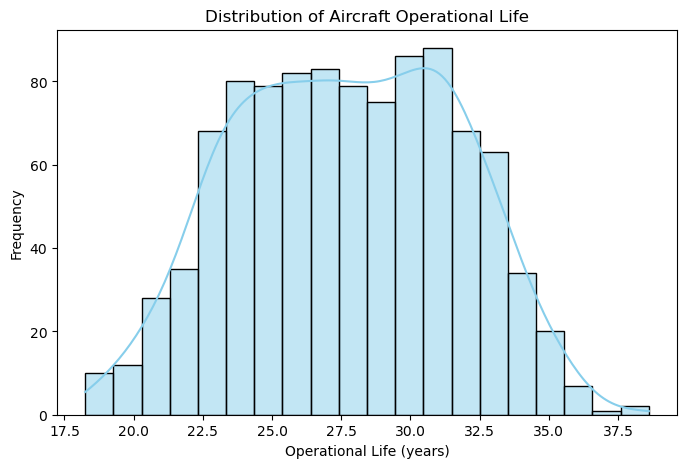

In [211]:
plt.figure(figsize=(8,5))
sns.histplot(df['Operational Life (years)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aircraft Operational Life')
plt.xlabel('Operational Life (years)')
plt.ylabel('Frequency')
plt.show()

The histogram of operational life visualizes the distribution of aircraft component lifespans, showing that most values are concentrated between 22 and 32 years. This graph helps identify general patterns and potential outliers in the dataset. From the histogram, it is clear that the majority of components have a lifespan within this range, suggesting that the dataset represents standard operational lifetimes and that there are no extreme outliers affecting the analysis.

## ii ) Boxplot of Operational Life by Material Type

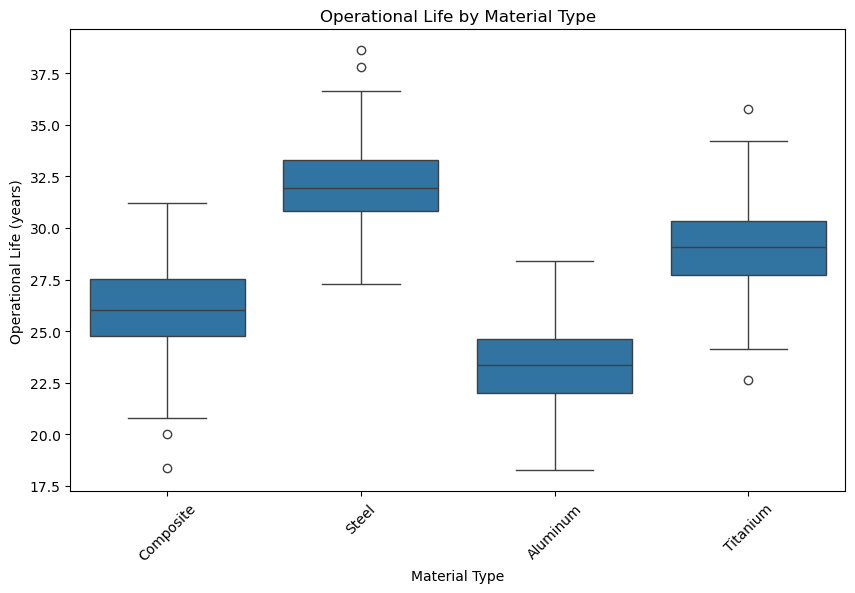

In [214]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Material Type', y='Operational Life (years)', data=df)
plt.title('Operational Life by Material Type')
plt.xlabel('Material Type')
plt.ylabel('Operational Life (years)')
plt.xticks(rotation=45)
plt.show()

The boxplot comparing operational life across different material types illustrates how material choice affects component lifespan. Composite materials have lifespans between 25 and 27.5 years, steel between 31 and 33 years, aluminum between 22.5 and 24.5 years, and titanium between 28 and 31 years. This graph shows the variability and central tendency for each material, highlighting that steel and titanium components generally last longer, while aluminum has the shortest lifespan, indicating material selection is a key factor in structural longevity.

### iii) Boxplot: Operational Life by Structural Shape

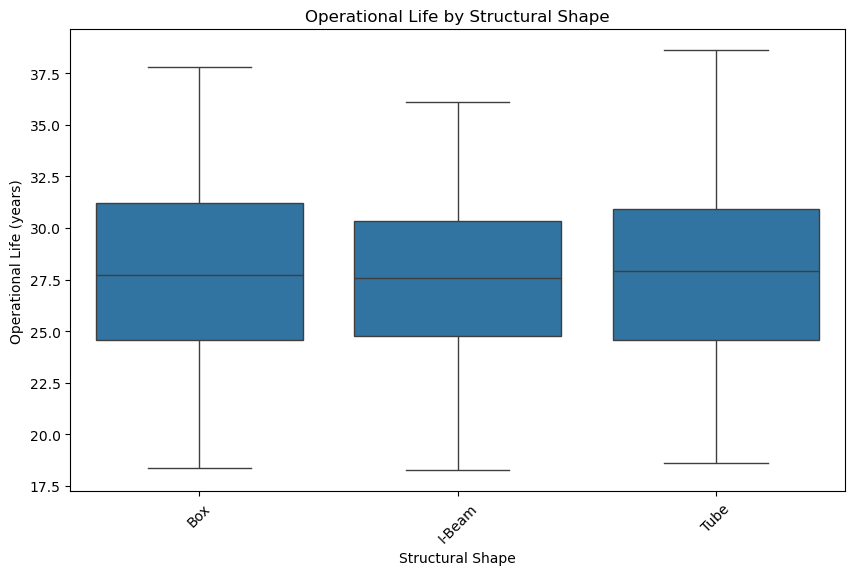

In [217]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Structural Shape', y='Operational Life (years)', data=df)
plt.title('Operational Life by Structural Shape')
plt.xlabel('Structural Shape')
plt.ylabel('Operational Life (years)')
plt.xticks(rotation=45)
plt.show()

The boxplot of operational life by structural shape demonstrates the influence of geometry on lifespan. Box-shaped components range between 24 and 31 years, I-beams between 25 and 30 years, and tubes between 24 and 30.5 years. This visualization shows that operational life is fairly consistent across shapes, with slight variations, suggesting that while design geometry has some effect on lifespan, it is less critical than material choice.

### iv) Scatter plot: Tensile Strength vs Operational Life

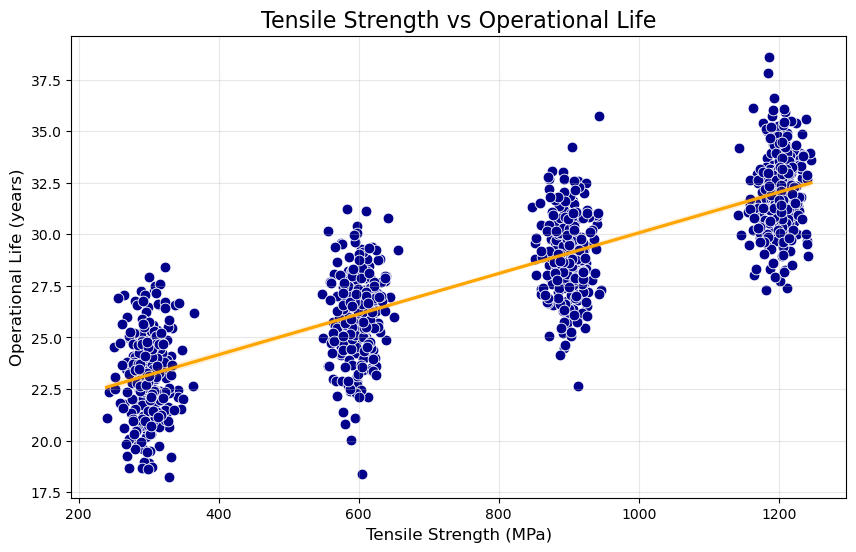

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df_physical['Tensile Strength (MPa)'],
    y=df_physical['Operational Life (years)'],
    color='darkblue',
    s=60
)

plt.title('Tensile Strength vs Operational Life', fontsize=16)
plt.xlabel('Tensile Strength (MPa)', fontsize=12)
plt.ylabel('Operational Life (years)', fontsize=12)
plt.grid(alpha=0.3)

# Optional: add a trend line
sns.regplot(
    x=df_physical['Tensile Strength (MPa)'],
    y=df_physical['Operational Life (years)'],
    scatter=False, color='orange'
)

plt.show()

The scatter plot of Tensile Strength versus Operational Life shows a clear positive relationship between material strength and component lifespan. When tensile strength is around 300 MPa, the operational life ranges between 17 and 28 years. For materials with tensile strength near 600 MPa, the operational life increases to approximately 22 to 31 years. Components with very high tensile strength, around 1200 MPa, exhibit the longest lifespans, between 27.5 and 38 years. This indicates that stronger materials tend to have longer operational lives, highlighting the importance of material selection in aerospace structural design.

## Data Balance

In [223]:
def compute_entropy(series):
    proportions = series.value_counts(normalize=True)
    entropy = -np.sum(proportions * np.log2(proportions))
    max_entropy = np.log2(len(proportions))
    ratio = entropy / max_entropy if max_entropy > 0 else np.nan
    return {
        "entropy": entropy,
        "max_entropy": max_entropy,
        "ratio": ratio
    }
result = compute_entropy(df['Vibration Damping'])
print(result)

{'entropy': 1.5812848904147625, 'max_entropy': 1.584962500721156, 'ratio': 0.9976796862356553}


In [224]:
result = compute_entropy(df['Material Type'])
print(result)

{'entropy': 1.995174105431494, 'max_entropy': 2.0, 'ratio': 0.997587052715747}


In [225]:
result = compute_entropy(df['Structural Shape'])
print(result)

{'entropy': 1.5848222326702155, 'max_entropy': 1.584962500721156, 'ratio': 0.9999115007131861}


In [226]:
result = compute_entropy(df['Load Distribution'])
print(result)

{'entropy': 1.584674116465962, 'max_entropy': 1.584962500721156, 'ratio': 0.9998180497929364}


All categorial variables have a high ratio near 0.99. This means that the distribution of our vibration damping classes is almost perfectly balance, so no major corrective action is needed for this variable.

## Data Preprocessing

In this section, we summarize the data preprocessing steps used before training the models:

1. Missing values: check if any feature contains `NaN` values. If necessary, we could drop or impute these values, but here the dataset does not contain missing values.
2. Duplicates: detect duplicated rows to avoid biasing the models.

In [230]:
#Number of missing values in the dataset
df.isna().sum()

Material Type                0
E (GPa)                      0
ν                            0
ρ (kg/m³)                    0
Tensile Strength (MPa)       0
Young’s Modulus              0
Altitude (m)                 0
Temperature (°C)             0
Pressure (Pa)                0
Operational Life (years)     0
Wing Span (m)                0
Fuselage Length (m)          0
Structural Thickness (mm)    0
Structural Shape             0
Load Distribution            0
Vibration Damping            0
Weight Efficiency            0
Durability                   0
Computational Time           0
Quantum Algorithm Type       0
Number of Iterations         0
Optimization Time (sec)      0
dtype: int64

There is no missing values in the dataset

In [232]:
#Number of duplicates in the dataset
print(df.duplicated().sum())

0


There is no duplicate values in the dataset

## Outliers of the dataset

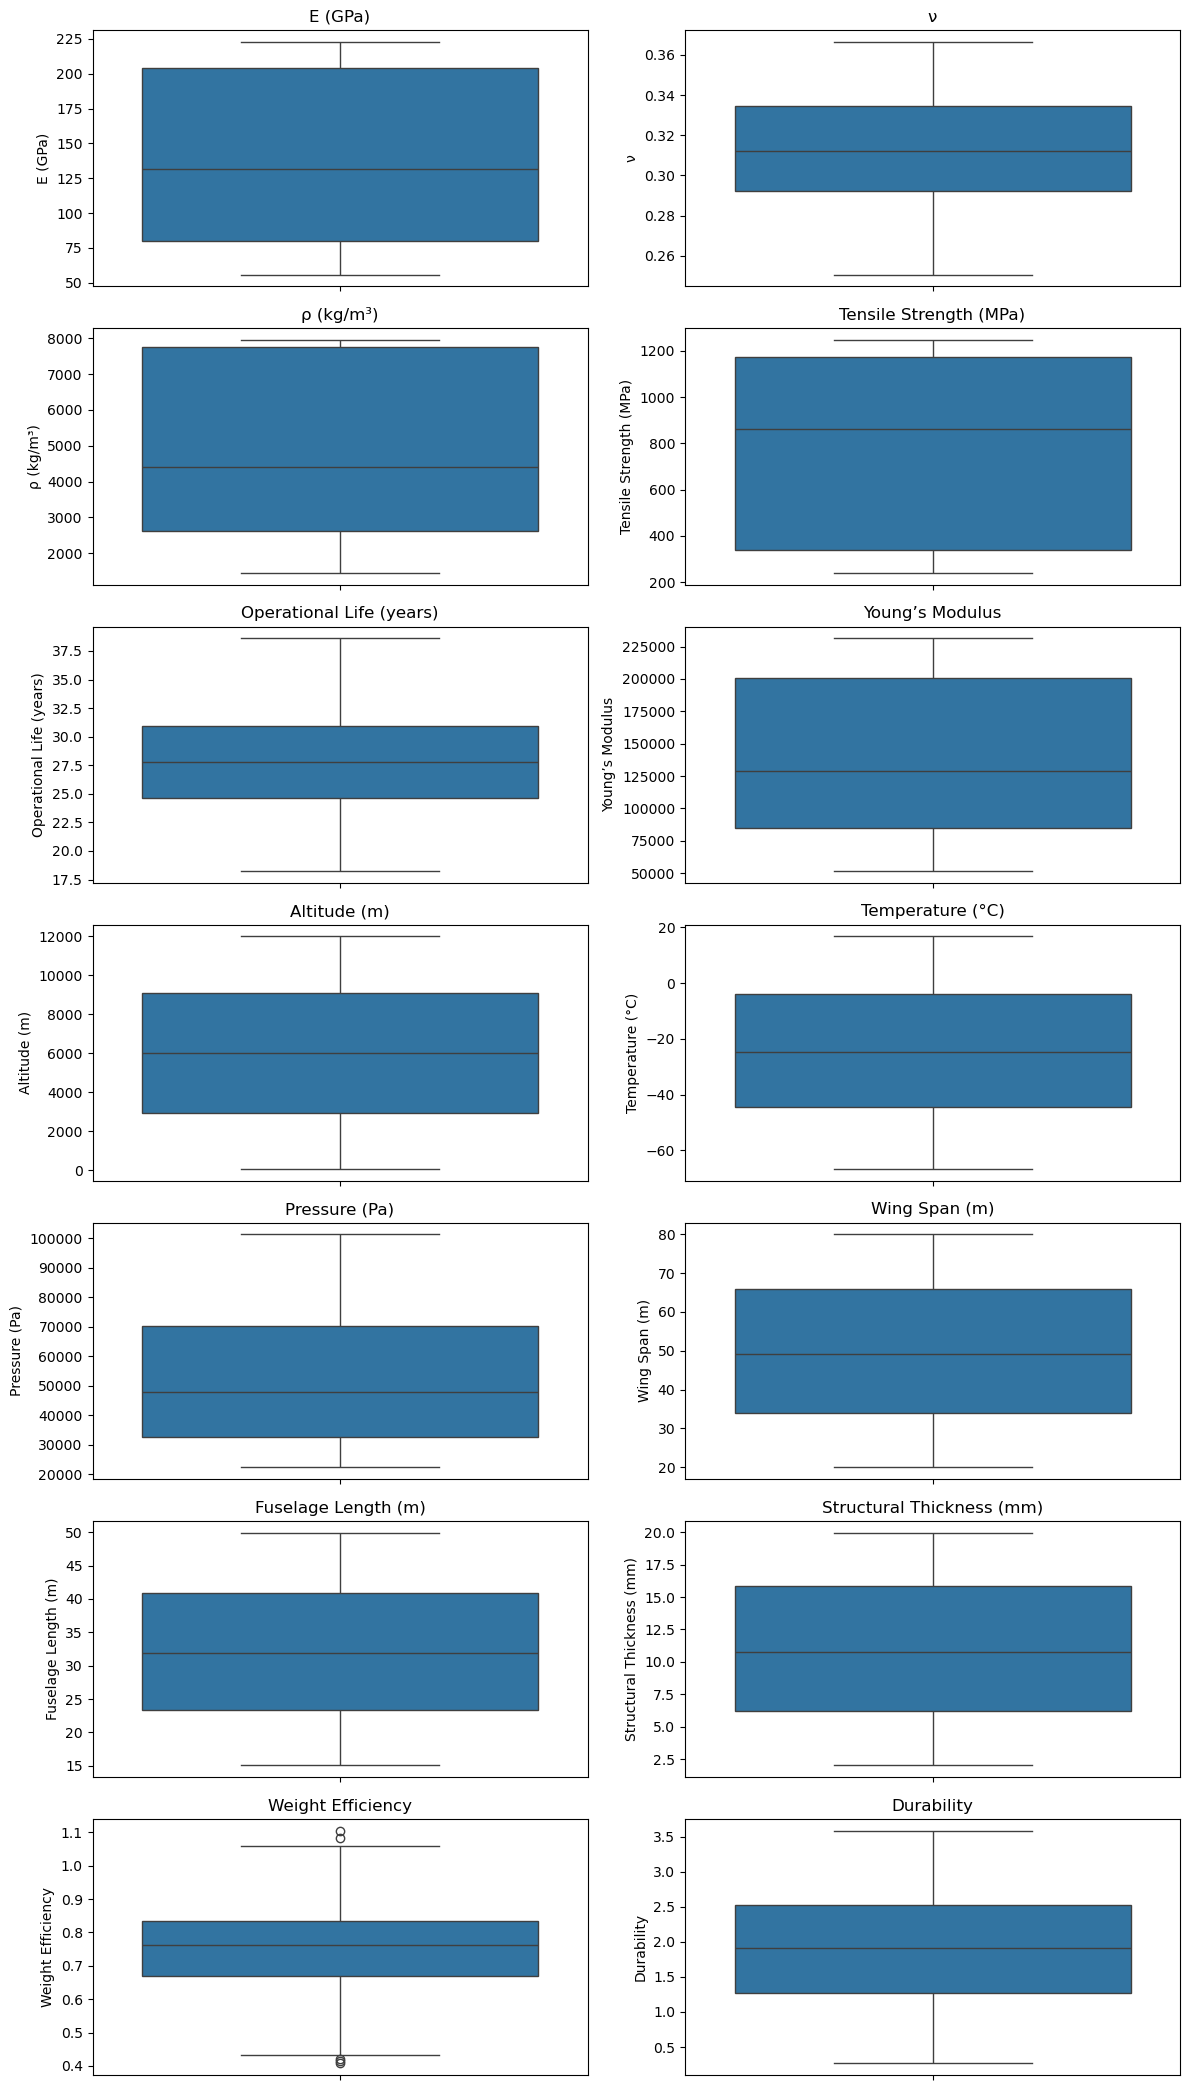

In [235]:

# Numerical Physical features
numerical_features = df_physical.select_dtypes(include='number')
n_cols = len(numerical_features.columns)

# Définir le nombre de colonnes du plot
n_plot_cols = 2
n_plot_rows = math.ceil(n_cols / n_plot_cols)  # calcule automatiquement le nb de lignes

fig, axes = plt.subplots(n_plot_rows, n_plot_cols, figsize=(12, n_plot_rows*3))

axes = axes.reshape(-1)

for i, col in enumerate(numerical_features.columns):
    sns.boxplot(y=df_physical[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Since outliers exist mainly in Weight Efficiency, this indicates that normalization of
the dataset will be necessary before training machine learning models.

## Encoding

In [238]:
print(df_physical.columns)

Index(['Material Type', 'E (GPa)', 'ν', 'ρ (kg/m³)', 'Tensile Strength (MPa)',
       'Operational Life (years)', 'Young’s Modulus', 'Altitude (m)',
       'Temperature (°C)', 'Pressure (Pa)', 'Wing Span (m)',
       'Fuselage Length (m)', 'Structural Thickness (mm)', 'Structural Shape',
       'Load Distribution', 'Vibration Damping', 'Weight Efficiency',
       'Durability'],
      dtype='object')


In [239]:
df_physical = df_physical.copy()

# Ordinal columns: LabelEncoder

ordinal_cols = ['Vibration Damping', 'Weight Efficiency', 'Durability']
label = LabelEncoder()
for col in ordinal_cols:
    df_physical[col] = label.fit_transform(df_physical[col])

# Nominal columns: One-Hot Encoding

nominal_cols = ['Material Type', 'Structural Shape', 'Load Distribution']
df_physical = pd.get_dummies(df_physical, columns=nominal_cols, drop_first=True)

df_physical.head()

,E (GPa),ν,ρ (kg/m³),Tensile Strength (MPa),Operational Life (years),Young’s Modulus,Altitude (m),Temperature (°C),Pressure (Pa),Wing Span (m),...,Vibration Damping,Weight Efficiency,Durability,Material Type_Composite,Material Type_Steel,Material Type_Titanium,Structural Shape_I-Beam,Structural Shape_Tube,Load Distribution_Tip-loaded,Load Distribution_Uniform
0,141.708780,0.293017,1588.479964,583.675655,25.553339,143069.963506,3120.576483,-4.737726,68696.231977,44.852033,...,0,725,439,True,False,False,False,False,False,True
1,219.380854,0.315615,7753.788343,1201.562861,33.771281,219094.502142,4620.696669,-19.183808,57364.381209,22.673398,...,2,168,803,False,True,False,False,False,False,True
2,74.752119,0.330320,2744.509921,317.232722,24.753846,77492.453814,11315.793409,-58.736571,24319.246429,67.066493,...,2,900,236,False,False,False,True,False,True,False
3,137.115482,0.272466,1651.762467,602.781208,25.983752,130418.034889,7324.512717,-32.577282,39937.880350,60.722794,...,0,955,523,True,False,False,True,False,True,False
4,135.507927,0.284600,1507.690607,568.460070,22.148339,131795.994791,10019.685428,-48.538755,29416.138129,48.368268,...,1,709,386,True,False,False,False,False,True,False


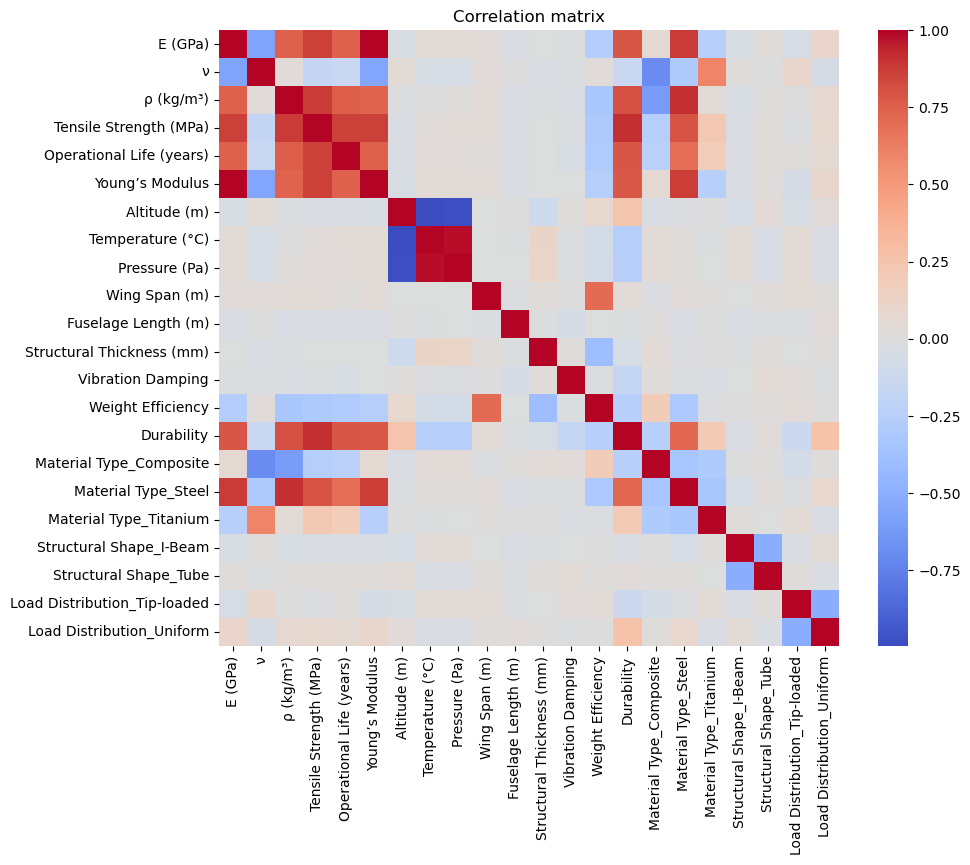

In [240]:
# Correlation matrix
corr_matrix = df_physical.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

The correlation matrix reveals that many features in the dataset are interrelated, such as temperature and pressure, which show a strong connection. Importantly, the matrix highlights the variables most strongly correlated with Operational Life, providing insight into which factors influence component lifespan. These include Durability, Young’s Modulus, Tensile Strength, Density (ρ), Elastic Modulus (E), and Material Type (material Type_1, Type_2, ...). This information is valuable for identifying the key predictors for machine learning models and for guiding design decisions, as these features have the greatest impact on operational performance.

## I) Regression Model
-> We aim to predict the operational life of an aircraft based on the physical data input into our model, achieving the highest possible accuracy.

## Feature selection

In [244]:
corr_with_target = corr_matrix['Operational Life (years)'].abs()
selected_features = corr_with_target[corr_with_target >= 0.20].index.tolist()

print("\nSelected Features with correlation >= 0.20:")
for col in selected_features:
    print(f"-> {col}")
    
# Remove target
selected_features.remove('Operational Life (years)')


Selected Features with correlation >= 0.20:
-> E (GPa)
-> ρ (kg/m³)
-> Tensile Strength (MPa)
-> Operational Life (years)
-> Young’s Modulus
-> Weight Efficiency
-> Durability
-> Material Type_Composite
-> Material Type_Steel


### Scaling and Train / Test Split

- Scaling: although tree‑based models such as Random Forests do not require feature scaling, other algorithms used in machine learning (like SVMs or gradient‑based methods) usually benefit from standardizing the numerical features. This can be done with `StandardScaler` inside a `Pipeline`.
- Train / test split: in the regression section below, the dataset is divided into training and test sets using `train_test_split(X, y, test_size=0.2, random_state=42)`. This ensures that model evaluation is done on data that was not seen during training and provides an unbiased estimate of performance.

In [247]:
#Split features/target:
X = df_physical[selected_features]
y = df_physical['Operational Life (years)']
X.head()

,E (GPa),ρ (kg/m³),Tensile Strength (MPa),Young’s Modulus,Weight Efficiency,Durability,Material Type_Composite,Material Type_Steel
0,141.708780,1588.479964,583.675655,143069.963506,725,439,True,False
1,219.380854,7753.788343,1201.562861,219094.502142,168,803,False,True
2,74.752119,2744.509921,317.232722,77492.453814,900,236,False,False
3,137.115482,1651.762467,602.781208,130418.034889,955,523,True,False
4,135.507927,1507.690607,568.460070,131795.994791,709,386,True,False


In [248]:
# Common train / test split for all models
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

## Normalization

In [250]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## PCA

In [252]:
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of principal components retained: {X_train_pca.shape[1]}")

Number of principal components retained: 4


### i) Linear Regression

In [314]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)  # Entraînement sur données PCA

y_pred_pca_train = lin_reg_pca.predict(X_train_pca)
y_pred_pca_test = lin_reg_pca.predict(X_test_pca)

MAE_pca_train = mean_absolute_error(y_train, y_pred_pca_train)
MAE_pca_test = mean_absolute_error(y_test, y_pred_pca_test)

RMSE_pca_train = np.sqrt(mean_squared_error(y_train, y_pred_pca_train))
RMSE_pca_test = np.sqrt(mean_squared_error(y_test, y_pred_pca_test))

R2_pca_train = r2_score(y_train, y_pred_pca_train)
R2_pca_test = r2_score(y_test, y_pred_pca_test)

print("\n----- LINEAR MODEL + PCA -----")
print(f"MAE Train : {MAE_pca_train:.2f}")
print(f"MAE Test  : {MAE_pca_test:.2f}\n")

print(f"RMSE Train : {RMSE_pca_train:.2f}")
print(f"RMSE Test  : {RMSE_pca_test:.2f}\n")

print(f"R² Train : {R2_pca_train:.4f}")
print(f"R² Test  : {R2_pca_test:.4f}")


----- LINEAR MODEL + PCA -----
MAE Train : 1.69
MAE Test  : 1.65

RMSE Train : 2.11
RMSE Test  : 2.06

R² Train : 0.7152
R² Test  : 0.7218


The Linear Regression model combined with PCA shows consistent performance on both training and test sets. With R² scores around 0.72 and similar MAE/RMSE values for train and test, the model demonstrates good generalization without signs of overfitting or underfitting. PCA has effectively reduced dimensionality while maintaining predictive accuracy.

### ii) Random Forest Regressor

----- RANDOM FOREST -----
MAE Train : 0.63
MAE Test  : 1.67

RMSE Train : 0.79
RMSE Test  : 2.09

R² Train : 0.9598
R² Test  : 0.7147

 Feature Importances:
                   Feature  Importance
2   Tensile Strength (MPa)    0.699441
1                ρ (kg/m³)    0.110819
3          Young’s Modulus    0.051693
0                  E (GPa)    0.051442
5               Durability    0.042652
4        Weight Efficiency    0.042227
7      Material Type_Steel    0.001409
6  Material Type_Composite    0.000318


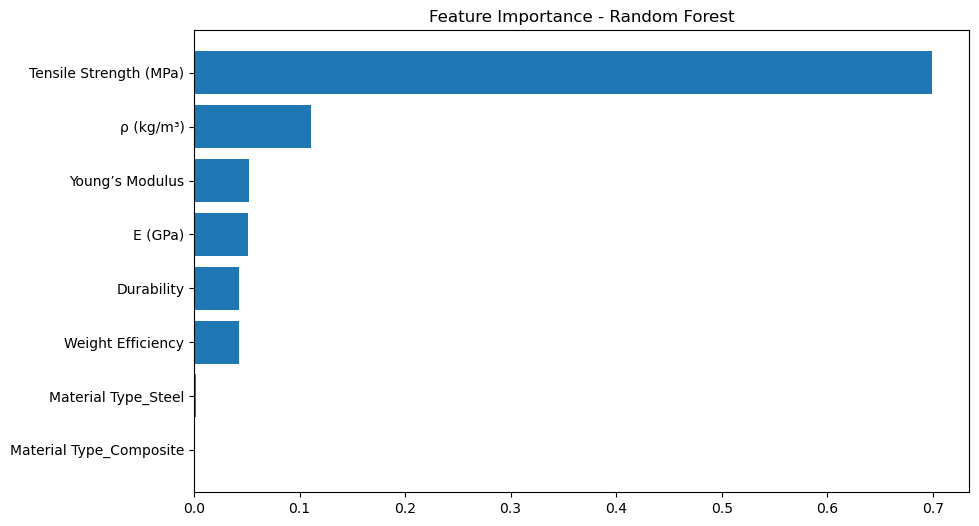

In [316]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print("----- RANDOM FOREST -----")
print(f"MAE Train : {MAE_train:.2f}")
print(f"MAE Test  : {MAE_test:.2f}\n")

print(f"RMSE Train : {RMSE_train:.2f}")
print(f"RMSE Test  : {RMSE_test:.2f}\n")

print(f"R² Train : {R2_train:.4f}")
print(f"R² Test  : {R2_test:.4f}")
baseline_results["Random Forest (baseline)"] = (mse, r2)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n Feature Importances:")
print(importances)

plt.figure(figsize=(10,6))
plt.barh(importances['Feature'], importances['Importance'])
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


The Random Forest model achieves excellent performance on the training set (R² ≈ 0.96), but the noticeable drop in R² and increase in errors on the test set (R² ≈ 0.71) indicate slight overfitting. Despite this, the model still generalizes reasonably well and outperforms the Linear Regression model in terms of training accuracy.

### iii) Decison Tree Regressor

In [320]:
dt_base = DecisionTreeRegressor(random_state=42)
dt_base.fit(X_train_scaled, y_train)

y_pred_train = dt_base.predict(X_train_scaled)
y_pred_test = dt_base.predict(X_test_scaled)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print("----- DECISION TREE REGRESSOR -----")
print(f"MAE Train : {MAE_train:.2f}")
print(f"MAE Test  : {MAE_test:.2f}\n")

print(f"RMSE Train : {RMSE_train:.2f}")
print(f"RMSE Test  : {RMSE_test:.2f}\n")

print(f"R² Train : {R2_train:.4f}")
print(f"R² Test  : {R2_test:.4f}")

baseline_results["Decision Tree (baseline)"] = (mse_dt, r2_dt)

----- DECISION TREE REGRESSOR -----
MAE Train : 0.00
MAE Test  : 2.37

RMSE Train : 0.00
RMSE Test  : 3.02

R² Train : 1.0000
R² Test  : 0.4035


The Decision Tree model perfectly fits the training data (R² = 1.00, MAE/RMSE = 0), but its performance drops significantly on the test set (R² ≈ 0.40, MAE ≈ 2.37, RMSE ≈ 3.02), indicating strong overfitting. The model captures the training patterns exactly but fails to generalize to unseen data. 

### iv) SVM Regressor

In [322]:
svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

svr_pipeline.fit(X_train_scaled, y_train)

y_pred_train = svr_pipeline.predict(X_train_scaled)
y_pred_test = svr_pipeline.predict(X_test_scaled)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print("----- SVR (Support Vector Regressor) -----")
print(f"MAE Train : {MAE_train:.2f}")
print(f"MAE Test  : {MAE_test:.2f}\n")

print(f"RMSE Train : {RMSE_train:.2f}")
print(f"RMSE Test  : {RMSE_test:.2f}\n")

print(f"R² Train : {R2_train:.4f}")
print(f"R² Test  : {R2_test:.4f}")

baseline_results["SVR (baseline)"] = (mse_svr, r2_svr)

----- SVR (Support Vector Regressor) -----
MAE Train : 1.60
MAE Test  : 1.56

RMSE Train : 2.02
RMSE Test  : 1.95

R² Train : 0.7395
R² Test  : 0.7515


The SVR model demonstrates consistent performance on both training and test sets, with very similar MAE, RMSE, and R² values (R² ≈ 0.74–0.75). This indicates good generalization, with no signs of overfitting or underfitting.

### v) SVM Regressor Optimizes with GridSearchCV

In [324]:
svr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

param_grid_svr = {
    "svr__kernel": ["rbf", "linear"],
    "svr__C": [0.1, 1, 10, 100],
    "svr__gamma": ["scale", "auto"]
}

grid_svr = GridSearchCV(
    estimator=svr_pipe,
    param_grid=param_grid_svr,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_svr.fit(X_train_scaled, y_train)

print("Best parameters for SVR:")
print(grid_svr.best_params_)

best_svr = grid_svr.best_estimator_

y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

# Évaluation
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print("\n----- SVR Optimized -----")
print(f"MAE Train : {MAE_train:.2f}")
print(f"MAE Test  : {MAE_test:.2f}\n")

print(f"RMSE Train : {RMSE_train:.2f}")
print(f"RMSE Test  : {RMSE_test:.2f}\n")

print(f"R² Train : {R2_train:.4f}")
print(f"R² Test  : {R2_test:.4f}")

baseline_results["SVR Optimized"] = (RMSE_test, R2_test)

Best parameters for SVR:
{'svr__C': 1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}

----- SVR Optimized -----
MAE Train : 1.60
MAE Test  : 1.55

RMSE Train : 2.02
RMSE Test  : 1.95

R² Train : 0.7395
R² Test  : 0.7513


The optimized SVR model shows very similar performance on both training and test sets, with MAE, RMSE, and R² values nearly identical to the baseline model. This indicates good generalization and no signs of overfitting, suggesting that hyperparameter tuning slightly improved stability without overcomplicating the model.

### Conclusion on Baseline models performance

In [327]:
print("CONCLUSION:Baseline models performance:")
for name, (mse, r2) in baseline_results.items():
    print(f"{name:25s} -> MSE = {mse:.3f} | R² = {r2:.3f}")

CONCLUSION:Baseline models performance:
Linear Regression + PCA   -> MSE = 4.253 | R² = 0.722
Random Forest (baseline)  -> MSE = 3.802 | R² = 0.751
Decision Tree (baseline)  -> MSE = 9.119 | R² = 0.404
SVR (baseline)            -> MSE = 3.799 | R² = 0.752
SVR Optimized             -> MSE = 1.950 | R² = 0.751


# Final Conclusion

In this project, our goal was to develop predictive models capable of supporting engineers in making data-driven decisions to optimize the design and durability of aerospace components. The operational life of structural parts is a critical factor in both safety and cost efficiency, as premature failures can lead to expensive maintenance, operational delays, or even safety risks. To tackle this challenge, we combined a diverse set of features, including physical properties, geometric parameters, operational conditions, and results from computational simulations, creating a comprehensive dataset that reflects the complex interactions affecting component performance.

We explored a range of machine learning approaches to model these relationships. Linear models with dimensionality reduction served as a baseline, demonstrating that a substantial portion of variability can be captured through relatively straightforward relationships. More complex methods, such as decision trees and ensemble models, highlighted the importance of preventing overfitting and ensuring robust generalization. Among all techniques tested, Support Vector Regression consistently delivered the most accurate and reliable predictions, demonstrating its suitability for high-stakes engineering applications.

From a business perspective, the ability to accurately predict component lifespan has direct implications for design efficiency, cost reduction, and operational reliability. By anticipating potential failure points, engineers can prioritize material selection, structural reinforcement, and maintenance planning, ultimately reducing unplanned downtime and improving overall fleet performance. Our results indicate that optimized SVR provides a scalable and practical tool for these objectives, making it the strongest candidate for integration into aerospace structural analysis workflows. This project illustrates how applying machine learning to engineering datasets can transform predictive maintenance and design optimization from reactive processes into proactive, data-driven strategies, thereby delivering tangible business value.